# Regressão Linear Simples - Trabalho

## Estudo de caso: Seguro de automóvel sueco

Agora, sabemos como implementar um modelo de regressão linear simples. Vamos aplicá-lo ao conjunto de dados do seguro de automóveis sueco. Esta seção assume que você baixou o conjunto de dados para o arquivo insurance.csv, o qual está disponível no notebook respectivo.

O conjunto de dados envolve a previsão do pagamento total de todas as reclamações em milhares de Kronor sueco, dado o número total de reclamações. É um dataset composto por 63 observações com 1 variável de entrada e 1 variável de saída. Os nomes das variáveis são os seguintes:

1. Número de reivindicações.
2. Pagamento total para todas as reclamações em milhares de Kronor sueco.

Voce deve adicionar algumas funções acessórias à regressão linear simples. Especificamente, uma função para carregar o arquivo CSV chamado *load_csv ()*, uma função para converter um conjunto de dados carregado para números chamado *str_column_to_float ()*, uma função para avaliar um algoritmo usando um conjunto de treino e teste chamado *split_train_split ()*, a função para calcular RMSE chamado *rmse_metric ()* e uma função para avaliar um algoritmo chamado *evaluate_algorithm()*.

Utilize um conjunto de dados de treinamento de 60% dos dados para preparar o modelo. As previsões devem ser feitas nos restantes 40%. 

Compare a performabce do seu algoritmo com o algoritmo baseline, o qual utiliza a média dos pagamentos realizados para realizar a predição ( a média é 72,251 mil Kronor).


In [29]:
from math import sqrt
from csv import reader
import pandas as pd
import random
import numpy as np

# MatPlotlib
%matplotlib inline 
import matplotlib.pyplot as plt

In [1]:
# Calculate the mean value of a list of numbers
def mean(values):
  return sum(values)/float(len(values))

In [2]:
# Calculate the variance of a list of numbers
def variance(values, mean):
    return sum([(x-mean)**2 for x in values])


In [3]:
# Calculate covariance between x and y
def covariance(x,y):
    cov = 0.0
    for i in range(len(x)):
        cov += (x[i]-mean(x)) * (y[i] - mean(y))
    return cov

In [18]:
# Calculate coefficients
def coefficients(dataset):
    x = [row[0] for row in dataset]
    y = [row[1] for row in dataset]
    b1 = covariance(x,y)/variance(x, mean(x))
    b0 = mean(x) - b1*mean(x)
    return [b0, b1]

In [7]:
def simple_linear_regression(train, test):
  predictions = list()
  b0, b1 = coefficients(train)
  for row in test:
    ypred = b0 + b1 * row[0]
    predictions.append(ypred)
  actual = [row[-1] for row in test]
  return rmse_metric(actual, predictions)

In [8]:
# Calculate root mean squared error
def rmse_metric(actual, predicted):
  sum_error = 0.0
  for i in range(len(actual)):
    prediction_error = predicted[i] - actual[i]
    sum_error += (prediction_error ** 2)
  mean_error = sum_error / float(len(actual))
  return sqrt(mean_error)

In [9]:
# Evaluate regression algorithm on training dataset
def evaluate_algorithm(dataset, algorithm):
  test_set = list()
  for row in dataset:
    row_copy = list(row)
    row_copy[-1] = None
    test_set.append(row_copy)
  predicted = algorithm(dataset, test_set)
  print(predicted)
  actual = [row[-1] for row in dataset]
  rmse = rmse_metric(actual, predicted)
  return rmse

In [12]:
# Load a CSV file
def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset

In [14]:
# String to float convsersion
def str_column_to_float(dataset, column):
    for row in dataset:
        row[column] = float(row[column].strip())

In [16]:
def splitDataset(dataset, splitRatio):
    trainSize = int(len(dataset) * splitRatio)
    trainSet = []
    copy = list(dataset)
    while len(trainSet) < trainSize:
        index = random.randrange(len(copy))
        trainSet.append(copy.pop(index))
    #trainSet = pd.DataFrame(trainSet, columns=["property", "classes"])
    #copy = pd.DataFrame(copy, columns=["property", "classes"])
    return [trainSet, copy]

In [21]:
dataset = load_csv('insurance.csv')
str_column_to_float(dataset, 0)
str_column_to_float(dataset, 1)
train, test = splitDataset(dataset, 0.7)
simple_linear_regression(train, test)

83.42268550379838

In [42]:
# Separating Feature and class
claims = []
payment = []
for data in dataset:
    claims.append(data[0])
    payment.append(data[1])

[310.03200210606246, -7.511165553293978, -21.023640772841063, -37.914234797274915, 107.34487381285622, -34.53611599238815, 22.89190369068696, -24.40175957772783, -41.29235360216168, -31.157997187501373, -41.29235360216168, -34.53611599238815, -37.914234797274915, 19.51378488580019, 151.26041827638426, -14.26740316306752, -0.7549279435204355, 130.99170544706362, -7.511165553293978]


TypeError: expected x and y to have same length

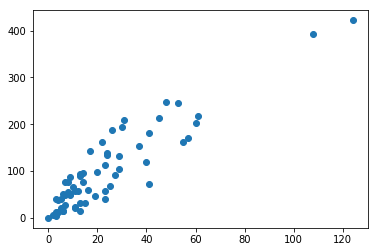

In [51]:
## FAÇA O PLOT DOS DADOS AQUI

plt.scatter(claims,payment)

#plt.plot([0,120], [0, 400])
predictions = []
b0, b1 = coefficients(train)

for row in test:
    ypred = b0 + b1 * row[0]
    predictions.append(ypred)
print(predictions)
axes = plt.gca()
m, b = np.polyfit(test[0], predictions, 1)
X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
plt.plot(X_plot, m*X_plot + b, '-')

plt.title('Insurence Dataset')
plt.xlabel('claims')
plt.ylabel('payment')
plt.show()
